In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/home/ci411/pcen-t-varying/')

from pcen_t.utils import *
from pcen_t.models import MODELS
#import eval_milsed

MODEL_PATH = '/beegfs/ci411/pcen/models/models_122'

URBANSED_CLASSES = ['air_conditioner',
                    'car_horn',
                    'children_playing',
                    'dog_bark',
                    'drilling',
                    'engine_idling',
                    'gun_shot',
                    'jackhammer',
                    'siren',
                    'street_music']

Using TensorFlow backend.


In [2]:
from collections import OrderedDict
from keras.models import model_from_yaml

from pcen_t.utils import * 
from pcen_t.models import MODELS, SqueezeLayer
from pcen_t import pcen_pump
sys.modules['pcen_pump'] = pcen_pump

def compare_results(OUTPUT_PATH, versions, sort=False,
                    is_ensemble=False, results_name='results'):
    results = OrderedDict({})
    params = OrderedDict({})
    n_weights = OrderedDict({})

    # Load pump
    pump = pickle.load(
        open(os.path.join(OUTPUT_PATH, 'pump.pkl'), 'rb'))

    # Load results
    for version in versions:

        # Load results
        resultsfile = os.path.join(OUTPUT_PATH, version, results_name + '.json')
        with open(resultsfile, 'r') as fp:
            results[version] = json.load(fp)

        if is_ensemble:
            n_weights[version] = 'ensemble'
            params[version] = {'modelname': version}
        else:
            # Load params
            #paramsfile = os.path.join(OUTPUT_PATH, version, 'params.json')
            #with open(paramsfile, 'r') as fp:
            #    params[version] = json.load(fp)
            
            modelfile = os.path.join(OUTPUT_PATH, version, 'model.yaml')
            with open(modelfile, 'r') as yaml_file:
                params[version] = yaml_file.read()
            
            # Compute model size
            #HACK ALERT
            model = model_from_yaml(params[version], custom_objects={'SqueezeLayer':SqueezeLayer})
            n_weights[version] = model.count_params()

    # Convert to dataframe
    df = pd.DataFrame(
        columns=['version', 'model', 'n_weights', 's_f1', 's_p', 's_r', 's_e'])
    for k in results.keys():
        r = results[k]
        strong_f = r['overall']['f_measure']
        strong_e = r['overall']['error_rate']
        data = (
            k, 'cnn_l3_strong', n_weights[k],
            strong_f['f_measure'], strong_f['precision'], strong_f['recall'],
            strong_e['error_rate'])
        df.loc[len(df), :] = data

    if sort:
        df = df.sort_values('version')
    return df


In [10]:
def collect_models(model_path):
    models = os.listdir(model_path)
    results = {}
    for model in models:
        path = os.path.join(model_path, model)
        if os.path.isdir(path):
            try:
                with open(os.path.join(path, 'results.json'), 'r') as fd:
                    result = json.load(fd)
                results[model] = result
            except FileNotFoundError:
                print("No results.json file for model '{}'".format(model))
                results[model] = None
    return list(results.keys()), results

In [11]:
model_list, results =  collect_models(MODEL_PATH)
model_list.sort()
print(model_list)

['model122_dry_0', 'model122_dry_01', 'model122_dry_012', 'model122_dry_0123', 'model122_dry_01234', 'model122_dry_012345', 'model122_dry_0123456', 'model122_dry_01234567', 'model122_dry_012345678', 'model122_dry_0123456789', 'model122_dry_1', 'model122_dry_12345678', 'model122_dry_2', 'model122_dry_234567', 'model122_dry_3', 'model122_dry_3456', 'model122_dry_4', 'model122_dry_45', 'model122_dry_5', 'model122_dry_6', 'model122_dry_7', 'model122_dry_8', 'model122_dry_9', 'model122_wet_0', 'model122_wet_01', 'model122_wet_012', 'model122_wet_0123', 'model122_wet_01234', 'model122_wet_012345', 'model122_wet_0123456', 'model122_wet_01234567', 'model122_wet_012345678', 'model122_wet_0123456789', 'model122_wet_1', 'model122_wet_12345678', 'model122_wet_2', 'model122_wet_234567', 'model122_wet_3', 'model122_wet_3456', 'model122_wet_4', 'model122_wet_45', 'model122_wet_5', 'model122_wet_6', 'model122_wet_7', 'model122_wet_8', 'model122_wet_9']


In [12]:
dry_models = [model for model in model_list if "dry" in model]
wet_models = [model for model in model_list if "wet" in model]

In [13]:
compare_results(MODEL_PATH, dry_models, results_name='results_dry')

,version,model,n_weights,s_f1,s_p,s_r,s_e
0,model122_dry_0,cnn_l3_strong,561150,0.47552,0.486538,0.46499,0.743054
1,model122_dry_01,cnn_l3_strong,561298,0.495712,0.459982,0.537461,0.79383
2,model122_dry_012,cnn_l3_strong,561446,0.555562,0.561837,0.549425,0.642906
3,model122_dry_0123,cnn_l3_strong,561594,0.549384,0.568745,0.531298,0.645212
4,model122_dry_01234,cnn_l3_strong,561742,0.556241,0.519876,0.598076,0.703593
5,model122_dry_012345,cnn_l3_strong,561890,0.507894,0.536371,0.482288,0.698584
6,model122_dry_0123456,cnn_l3_strong,562038,0.561632,0.584623,0.54038,0.623914
7,model122_dry_01234567,cnn_l3_strong,562186,0.558365,0.50709,0.621176,0.729756
8,model122_dry_012345678,cnn_l3_strong,562334,0.556907,0.557038,0.556777,0.650402
9,model122_dry_0123456789,cnn_l3_strong,562482,0.521757,0.529521,0.514217,0.687664


In [14]:
compare_results(MODEL_PATH, wet_models, results_name='results_dry')

,version,model,n_weights,s_f1,s_p,s_r,s_e
0,model122_wet_0,cnn_l3_strong,561150,0.286776,0.394262,0.225341,0.898231
1,model122_wet_01,cnn_l3_strong,561298,0.362074,0.448335,0.303651,0.781181
2,model122_wet_012,cnn_l3_strong,561446,0.408059,0.475674,0.357274,0.790191
3,model122_wet_0123,cnn_l3_strong,561594,0.396622,0.429955,0.368085,0.827057
4,model122_wet_01234,cnn_l3_strong,561742,0.40573,0.535448,0.326606,0.731738
5,model122_wet_012345,cnn_l3_strong,561890,0.41779,0.397085,0.440773,0.890338
6,model122_wet_0123456,cnn_l3_strong,562038,0.378552,0.490452,0.308227,0.768388
7,model122_wet_01234567,cnn_l3_strong,562186,0.392392,0.406139,0.379545,0.872932
8,model122_wet_012345678,cnn_l3_strong,562334,0.426622,0.502319,0.370752,0.764784
9,model122_wet_0123456789,cnn_l3_strong,562482,0.367807,0.40875,0.334318,0.811236


In [15]:
results_df = compare_results(MODEL_PATH, model_list, results_name='results')

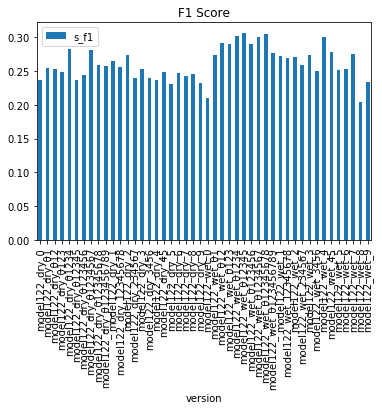

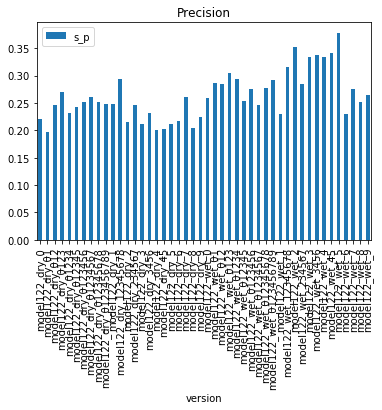

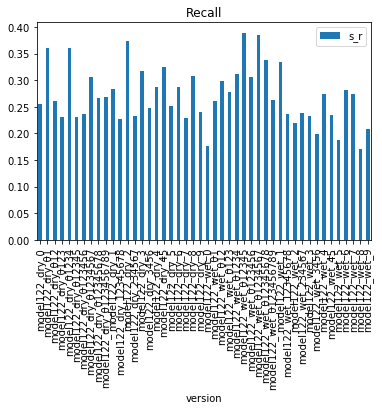

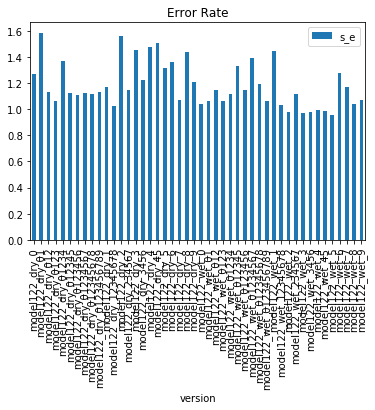

In [16]:
results_df.plot.bar(x='version', y='s_f1', title='F1 Score')
results_df.plot.bar(x='version', y='s_p', title='Precision')
results_df.plot.bar(x='version', y='s_r', title='Recall')
results_df.plot.bar(x='version', y='s_e', title='Error Rate')
plt.show()

In [66]:
def report_results(OUTPUT_PATH, version):
    # Load results
    resultsfolder = os.path.join(OUTPUT_PATH, version)
    resultsfile = os.path.join(resultsfolder, 'results.json')
    with open(resultsfile, 'r') as fp:
        results = json.load(fp)

    # report
    print('{:<10}{}'.format('Model', version))

    print('\nStrong:')
    strong_f = results['overall']['f_measure']
    strong_e = results['overall']['error_rate']
    print('{:<10}{:.3f}'.format('precision', strong_f['precision']))
    print('{:<10}{:.3f}'.format('recall', strong_f['recall']))
    print('{:<10}{:.3f}'.format('f1', strong_f['f_measure']))
    print('{:<10}{:.3f}'.format('e_rate', strong_e['error_rate']))

    print('\n{:<40}P\tR\tF\tE'.format('Strong per-class:'))
    strong_c = results['class_wise']
    c_sorted = [c for c in strong_c.keys()]
    c_sorted = sorted(c_sorted)
    for c in c_sorted:
        r_c = strong_c[c]['f_measure']
        r_ce = strong_c[c]['error_rate']
        print('{:<40}{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(c, r_c['precision'],
                                                            r_c['recall'],
                                                            r_c['f_measure'],
                                                            r_ce['error_rate']))

    # # Load training history
    # history_file = os.path.join(resultsfolder, 'history.pkl')
    # with open(history_file, 'rb') as fp:
    #     history = pickle.load(fp)

    # Load dynamic history CSV file
    csvfile = os.path.join(resultsfolder, 'history_csvlog.csv')
    history = pd.read_csv(csvfile)

    # Set sns style
    #sns.set()

    print('\nLoss:')

    # Visualize training history
    plt.figure(figsize=(9,6))
    plt.subplot(2,1,1)
    plt.plot(history['loss'], label='training loss')
    plt.plot(history['val_loss'], label='validation loss')
    #plt.axvline(np.argmin(history['val_loss']), color='r')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss: {}'.format(version))
    # plt.grid()
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['val_accuracy'], label='validation accuracy')
    #plt.axvline(np.argmax(history['accuracy']), color='r')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy: {}'.format(version))
    plt.legend()
    plt.tight_layout()

    plt.show()


Model     model122_wet_5

Strong:
precision 0.378
recall    0.188
f1        0.251
e_rate    0.952

Strong per-class:                       P	R	F	E
air_conditioner                         0.242	0.093	0.135	1.199
car_horn                                0.491	0.226	0.310	1.008
children_playing                        0.552	0.113	0.188	0.979
dog_bark                                0.430	0.175	0.249	1.057
drilling                                0.220	0.331	0.264	1.845
engine_idling                           0.358	0.131	0.192	1.104
gun_shot                                0.420	0.192	0.264	1.073
jackhammer                              0.562	0.239	0.335	0.948
siren                                   0.475	0.179	0.260	1.019
street_music                            0.578	0.213	0.311	0.943

Loss:


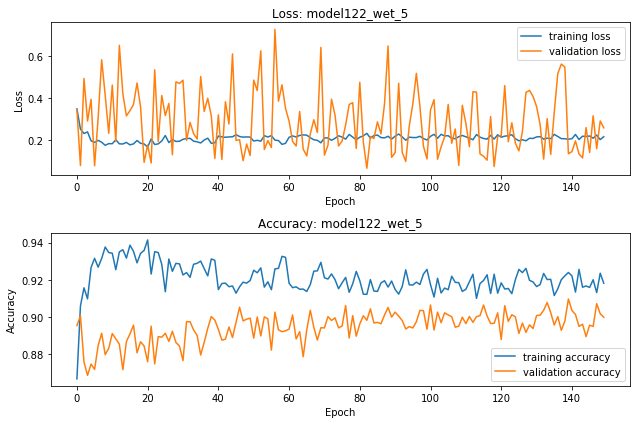

In [67]:
model_name = "model122_wet_5"

resultsfolder = os.path.join(MODEL_PATH, model_name)
resultsfile = os.path.join(resultsfolder, 'results.json')
with open(resultsfile, 'r') as fp:
    results = json.load(fp)
    
csvfile = os.path.join(resultsfolder, 'history_csvlog.csv')
history = pd.read_csv(csvfile)

report_results(MODEL_PATH, model_name)

In [68]:
def compare_results(model_path, dry_model, wet_model):
    # Load results
    dry_folder = os.path.join(model_path, dry_model)
    dry_resultsfile = os.path.join(dry_folder, 'results.json')
    with open(dry_resultsfile, 'r') as fp:
        dry_results = json.load(fp)

    wet_folder = os.path.join(model_path, wet_model)
    wet_resultsfile = os.path.join(wet_folder, 'results.json')
    with open(wet_resultsfile, 'r') as fp:
        wet_results = json.load(fp)
        
    # report
    print('{:<10}\n{}\n{}'.format('Models', dry_model, wet_model))
    
    dry_f = dry_results['overall']['f_measure']
    dry_e = dry_results['overall']['error_rate']
    
    wet_f = wet_results['overall']['f_measure']
    wet_e = wet_results['overall']['error_rate']
    
    keys = ['precision', 'recall', 'f_measure', 'error_rate']
    
    dry_metrics = [dry_f[key] for key in keys[:3]]
    wet_metrics = [wet_f[key] for key in keys[:3]]
    
    dry_metrics.append(dry_e['error_rate'])
    wet_metrics.append(wet_e['error_rate'])

    print('Overall Results:')
    plt.figure()
    x_keys = np.arange(len(keys))
    width_keys = 0.35
    
    plt.title('Overall Result Comparison for {} and {}'.format(dry_model, wet_model))
    plt.bar(x_keys-width_keys/2, dry_metrics, width_keys, label=dry_model)
    plt.bar(x_keys+width_keys/2, wet_metrics, width_keys, label=wet_model)
    plt.xticks(x_keys, keys)
    plt.legend()
    
    print('Per-class results:')
    dry_c = dry_results['class_wise']
    dry_c_metrics = {}

    wet_c = wet_results['class_wise']
    wet_c_metrics = {}

    c_sorted = [c for c in dry_c.keys()]
    c_sorted = sorted(c_sorted)
    
    for key in keys:
        dry_c_metrics[key] = []
        wet_c_metrics[key] = []
        
    for c in c_sorted:
        dry_cr = dry_c[c]['f_measure']
        dry_ce = dry_c[c]['error_rate']
        wet_cr = wet_c[c]['f_measure']
        wet_ce = wet_c[c]['error_rate']
        
        for key in keys:
            if key is not 'error_rate':
                dry_c_metrics[key].append(dry_cr[key])
                wet_c_metrics[key].append(wet_cr[key])
            else:
                dry_c_metrics[key].append(dry_ce[key])
                wet_c_metrics[key].append(wet_ce[key])
    
    for key in keys:
        plt.figure(figsize=(12,5))
        x_c = np.arange(len(c_sorted))
        width_c = 0.35
        plt.title('{} for {} and {}'.format(key, dry_model, wet_model))
        plt.bar(x_c-width_c/2, dry_c_metrics[key], width_c, label=dry_model)
        plt.bar(x_c+width_c/2, wet_c_metrics[key], width_c, label=wet_model)
        plt.xticks(x_c ,c_sorted)
        plt.legend()
    

    plt.show()

Models    
model122_wet_5
model122_wet_0123456789
Overall Results:
Per-class results:


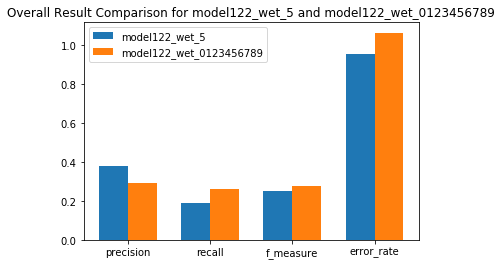

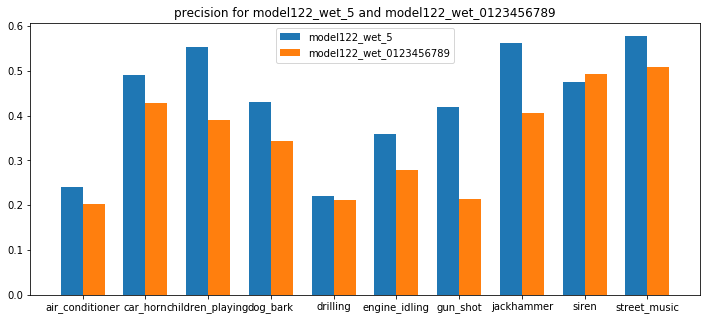

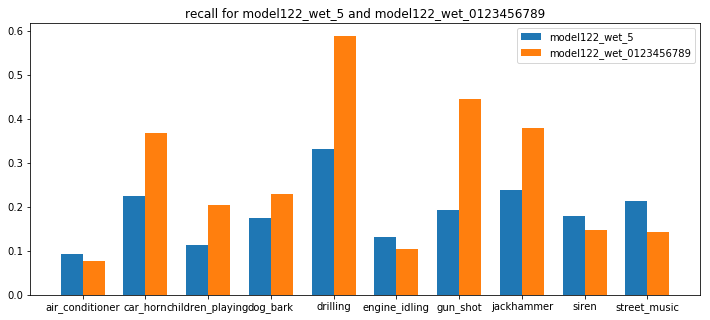

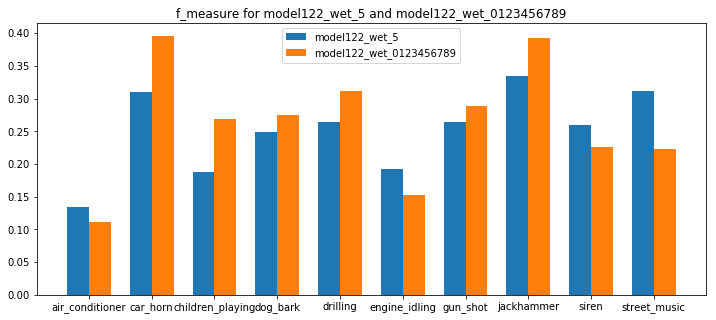

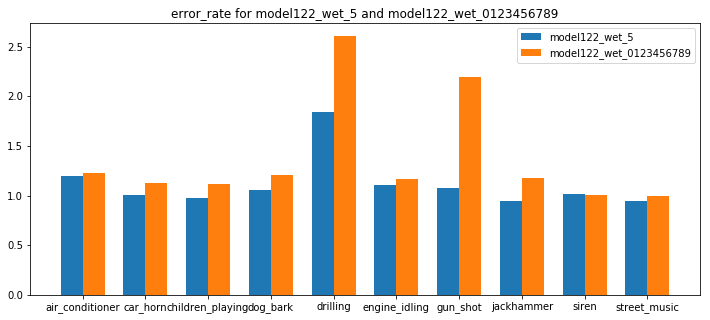

In [69]:
compare_results(MODEL_PATH, "model122_wet_5", "model122_wet_0123456789")

In [70]:
def extract_slices(models):
    return [[int(single_slice) for single_slice in slices.split('_')[2]] for slices in models]

In [71]:
def results_to_df(OUTPUT_PATH, versions, sort=False,
                    is_ensemble=False, results_name='results'):
    results = OrderedDict({})
    params = OrderedDict({})
    n_weights = OrderedDict({})

    # Load pump
    pump = pickle.load(
        open(os.path.join(OUTPUT_PATH, 'pump.pkl'), 'rb'))

    # Load results
    for version in versions:

        # Load overall results
        resultsfile = os.path.join(OUTPUT_PATH, version, results_name + '.json')
        with open(resultsfile, 'r') as fp:
            results[version] = json.load(fp)

        if is_ensemble:
            n_weights[version] = 'ensemble'
            params[version] = {'modelname': version}
        else:
            modelfile = os.path.join(OUTPUT_PATH, version, 'model.yaml')
            with open(modelfile, 'r') as yaml_file:
                params[version] = yaml_file.read()
            
            # Compute model size
            #HACK ALERT
            model = model_from_yaml(params[version], custom_objects={'SqueezeLayer':SqueezeLayer})
            n_weights[version] = model.count_params()
        
    # Convert to dataframe
    classes = results[list(results.keys())[0]]['class_wise'].keys()
    classes = sorted(classes)
    
    metrics =  ['precision', 'recall', 'f_measure', 'error_rate']
    metric_map = {'precision':'_p', 'recall':'_r', 'f_measure':'_f1', 'error_rate':'_e'}
    
    columns = ['version', 'model', 'n_weights',  'overall_p', 'overall_r', 'overall_f1', 'overall_e']
    for c in classes:
        for m in metrics:
            columns.append(c+metric_map[m])
    
    df = pd.DataFrame(columns=columns, dtype=float)
    
    for k in results.keys():
        r = results[k]
        strong_f = r['overall']['f_measure']
        strong_e = r['overall']['error_rate']
        strong_c = r['class_wise']
        data = [
            k, 'cnn_l3_strong', n_weights[k],
            strong_f['precision'], strong_f['recall'],
            strong_f['f_measure'], strong_e['error_rate']]
        for c in classes:
            for m in metrics:
                if m is not 'error_rate':
                    data.append(strong_c[c]['f_measure'][m])
                else:
                    data.append(strong_c[c]['error_rate'][m])
        df.loc[len(df), :] = tuple(data)

    columns.insert(1, 'training_set')
    columns.insert(2, 'slices')
    df['training_set'] = df['version'].map(lambda x : x.split('_')[1])
    df['slices'] = df['version'].map(lambda x : set(x.split('_')[2]))
    df = df[columns]
        
    if sort:
        df = df.sort_values('version')
    return df

total_results = results_to_df(MODEL_PATH, model_list)

In [72]:
total_results.to_csv('/beegfs/ci411/pcen/models/models_122/models_122_results.csv')

In [73]:
def compare_results_df(df, models, metric='overall', classes=URBANSED_CLASSES):
    n_models = len(models)
    data = []
    metric_dict = {'f1':'F1-Score', 'p':'Precision', 'r':'Recall', 'e':'Error Rate', 'overall':'Overall'}
    
    if metric=='overall':
        metrics_short = ['f1', 'p', 'r', 'e']
        columns = ['overall_'+m for m in metrics_short]
        labels = [metric_dict[l] for l in metrics_short]
        n_bars = 4
    else:
        columns = [c+'_'+metric for c in classes]
        n_bars = len(classes)
        labels = classes
    
    plt.figure(figsize=(16,10))
    plt.title("{} Comparison Results".format(metric_dict[metric]))
    x = np.arange(n_bars)
    full_width = (n_models/10)+.1
    width = full_width/(n_models-1)
    for i, model in enumerate(models):
        model_idx = df['version']==model
        results = df[model_idx][columns].values.tolist()[0]
        plt.bar(x-(full_width/2.)+(width*i), results, width, label=model)
    
    plt.xticks(x, labels)
    plt.legend()
    plt.show()

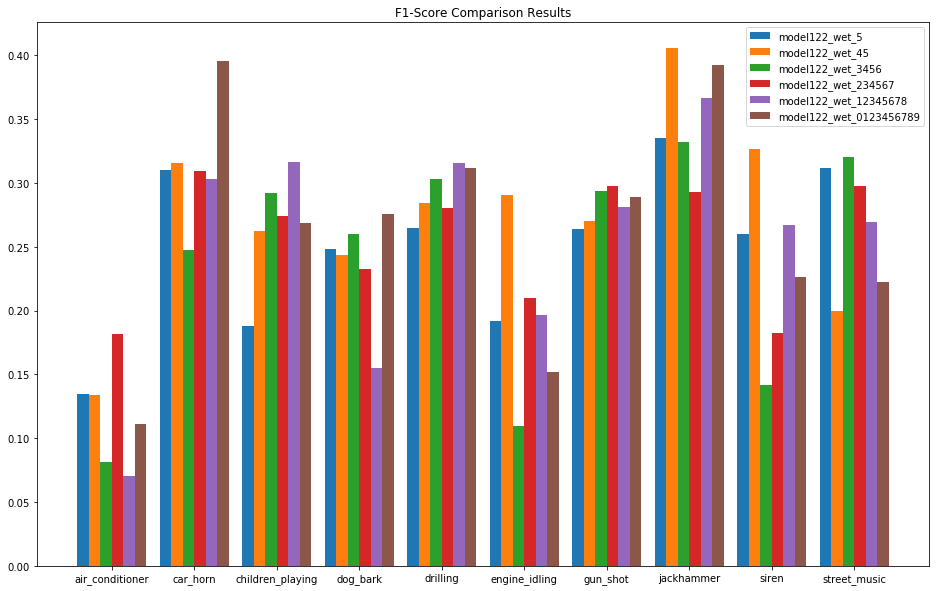

In [79]:
compare_results_df(total_results, ['model122_wet_5','model122_wet_45', 'model122_wet_3456', 'model122_wet_234567', 'model122_wet_12345678', 'model122_wet_0123456789'], metric='f1')

Model     model122_wet_5

Strong:
precision 0.378
recall    0.188
f1        0.251
e_rate    0.952

Strong per-class:                       P	R	F	E
air_conditioner                         0.242	0.093	0.135	1.199
car_horn                                0.491	0.226	0.310	1.008
children_playing                        0.552	0.113	0.188	0.979
dog_bark                                0.430	0.175	0.249	1.057
drilling                                0.220	0.331	0.264	1.845
engine_idling                           0.358	0.131	0.192	1.104
gun_shot                                0.420	0.192	0.264	1.073
jackhammer                              0.562	0.239	0.335	0.948
siren                                   0.475	0.179	0.260	1.019
street_music                            0.578	0.213	0.311	0.943

Loss:


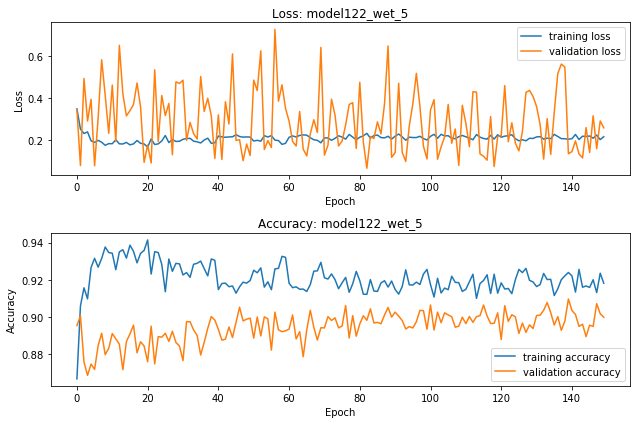

Model     model122_wet_45

Strong:
precision 0.342
recall    0.235
f1        0.279
e_rate    0.990

Strong per-class:                       P	R	F	E
air_conditioner                         0.213	0.098	0.134	1.264
car_horn                                0.480	0.235	0.316	1.019
children_playing                        0.583	0.169	0.263	0.952
dog_bark                                0.353	0.186	0.244	1.155
drilling                                0.208	0.452	0.284	2.273
engine_idling                           0.364	0.242	0.290	1.181
gun_shot                                0.387	0.207	0.270	1.121
jackhammer                              0.446	0.372	0.405	1.090
siren                                   0.446	0.258	0.327	1.062
street_music                            0.510	0.124	0.200	0.995

Loss:


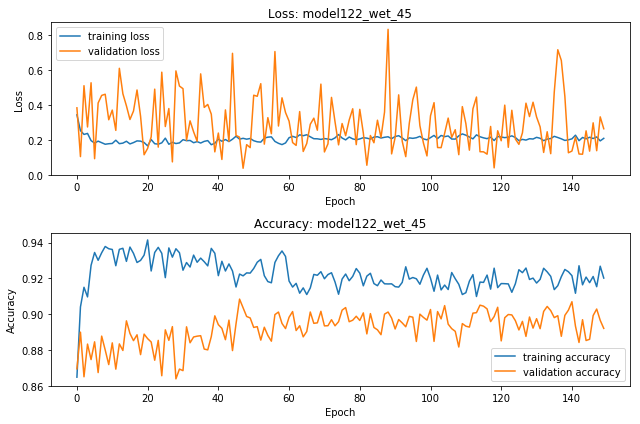

Model     model122_wet_3456

Strong:
precision 0.337
recall    0.198
f1        0.249
e_rate    0.982

Strong per-class:                       P	R	F	E
air_conditioner                         0.194	0.051	0.081	1.162
car_horn                                0.485	0.166	0.248	1.011
children_playing                        0.424	0.223	0.292	1.080
dog_bark                                0.290	0.236	0.260	1.344
drilling                                0.242	0.407	0.303	1.869
engine_idling                           0.323	0.066	0.110	1.073
gun_shot                                0.339	0.259	0.294	1.245
jackhammer                              0.492	0.251	0.332	1.008
siren                                   0.327	0.090	0.142	1.095
street_music                            0.489	0.238	0.320	1.011

Loss:


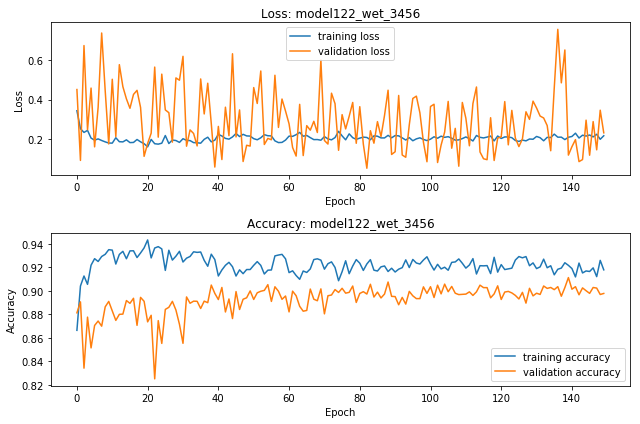

Model     model122_wet_234567

Strong:
precision 0.284
recall    0.239
f1        0.260
e_rate    1.113

Strong per-class:                       P	R	F	E
air_conditioner                         0.258	0.140	0.182	1.262
car_horn                                0.377	0.262	0.309	1.171
children_playing                        0.393	0.210	0.274	1.114
dog_bark                                0.414	0.162	0.233	1.067
drilling                                0.207	0.433	0.280	2.224
engine_idling                           0.209	0.210	0.209	1.586
gun_shot                                0.310	0.287	0.298	1.353
jackhammer                              0.245	0.366	0.293	1.764
siren                                   0.491	0.112	0.183	1.004
street_music                            0.463	0.219	0.298	1.035

Loss:


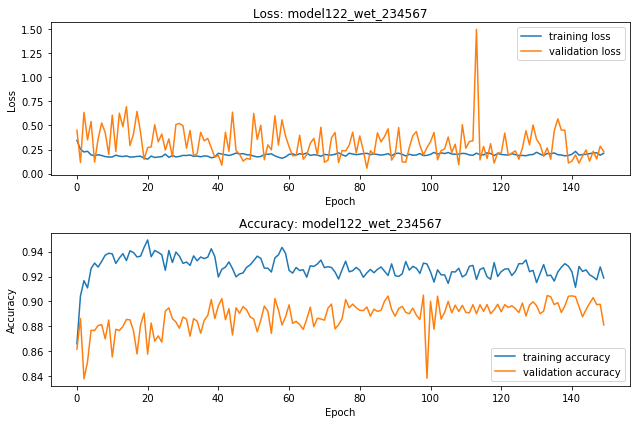

Model     model122_wet_12345678

Strong:
precision 0.315
recall    0.236
f1        0.270
e_rate    1.030

Strong per-class:                       P	R	F	E
air_conditioner                         0.197	0.043	0.070	1.131
car_horn                                0.386	0.249	0.303	1.147
children_playing                        0.402	0.261	0.317	1.128
dog_bark                                0.593	0.089	0.155	0.972
drilling                                0.234	0.484	0.315	2.100
engine_idling                           0.231	0.170	0.196	1.396
gun_shot                                0.288	0.274	0.281	1.403
jackhammer                              0.322	0.425	0.366	1.472
siren                                   0.445	0.191	0.267	1.048
street_music                            0.564	0.177	0.269	0.960

Loss:


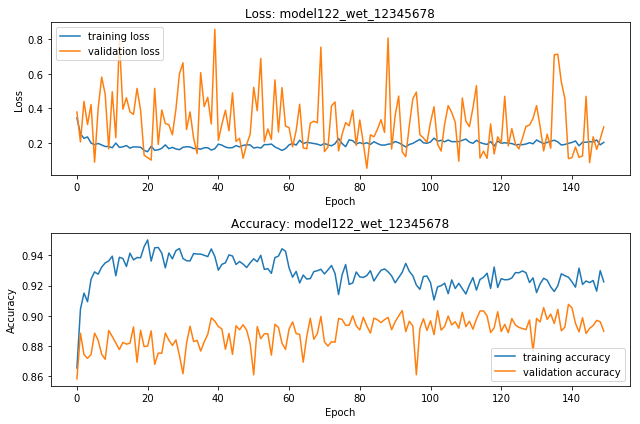

Model     model122_wet_0123456789

Strong:
precision 0.293
recall    0.263
f1        0.277
e_rate    1.062

Strong per-class:                       P	R	F	E
air_conditioner                         0.203	0.076	0.111	1.223
car_horn                                0.428	0.368	0.396	1.123
children_playing                        0.391	0.205	0.269	1.115
dog_bark                                0.343	0.230	0.275	1.211
drilling                                0.212	0.589	0.311	2.606
engine_idling                           0.279	0.104	0.152	1.166
gun_shot                                0.214	0.447	0.289	2.196
jackhammer                              0.407	0.379	0.393	1.174
siren                                   0.494	0.147	0.226	1.004
street_music                            0.508	0.142	0.223	0.995

Loss:


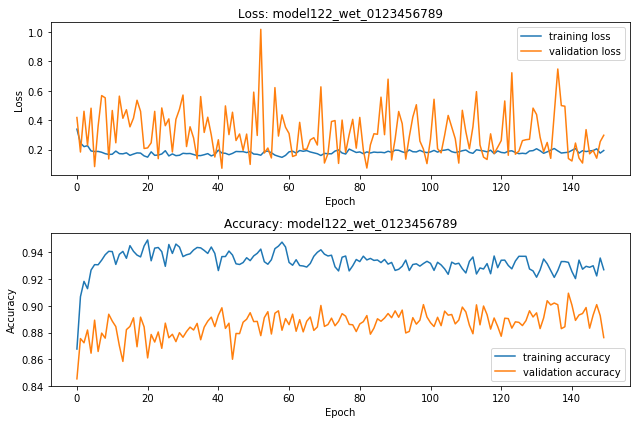

In [80]:
for model in ['model122_wet_5','model122_wet_45', 'model122_wet_3456', 'model122_wet_234567', 'model122_wet_12345678', 'model122_wet_0123456789']:
    report_results(MODEL_PATH, model)

Model     model122_wet_0123456789

Strong:
precision 0.293
recall    0.263
f1        0.277
e_rate    1.062

Strong per-class:                       P	R	F	E
air_conditioner                         0.203	0.076	0.111	1.223
car_horn                                0.428	0.368	0.396	1.123
children_playing                        0.391	0.205	0.269	1.115
dog_bark                                0.343	0.230	0.275	1.211
drilling                                0.212	0.589	0.311	2.606
engine_idling                           0.279	0.104	0.152	1.166
gun_shot                                0.214	0.447	0.289	2.196
jackhammer                              0.407	0.379	0.393	1.174
siren                                   0.494	0.147	0.226	1.004
street_music                            0.508	0.142	0.223	0.995

Loss:


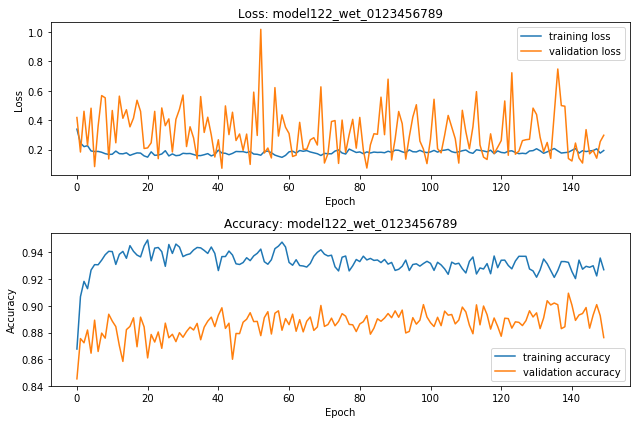

In [76]:
report_results(MODEL_PATH, 'model122_wet_0123456789')

In [77]:
model_path_210 = '/beegfs/ci411/pcen/models/models_210'
model_list_210, results_210 =  collect_models(model_path_210)
model_list_210.sort()
model_list_210.insert(0, model_list_210.pop(-1))
print(model_list_210)

No results.json file for model 'test4a_reducelr'
No results.json file for model 'test4b_reducelr'
['test_default', 'test1a_batchsize', 'test1b_batchsize', 'test2a_epochsize', 'test2b_epochsize', 'test3a_validsdize', 'test3b_validsdize', 'test4a_reducelr', 'test4b_reducelr']


Model     test_default

Strong:
precision 0.253
recall    0.299
f1        0.274
e_rate    1.205

Strong per-class:                       P	R	F	E
air_conditioner                         0.177	0.583	0.272	3.128
car_horn                                0.254	0.481	0.332	1.933
children_playing                        0.315	0.239	0.272	1.282
dog_bark                                0.515	0.108	0.179	0.994
drilling                                0.311	0.320	0.315	1.390
engine_idling                           0.180	0.449	0.257	2.593
gun_shot                                0.436	0.127	0.196	1.037
jackhammer                              0.607	0.104	0.178	0.963
siren                                   0.398	0.456	0.425	1.233
street_music                            0.251	0.118	0.160	1.234

Loss:


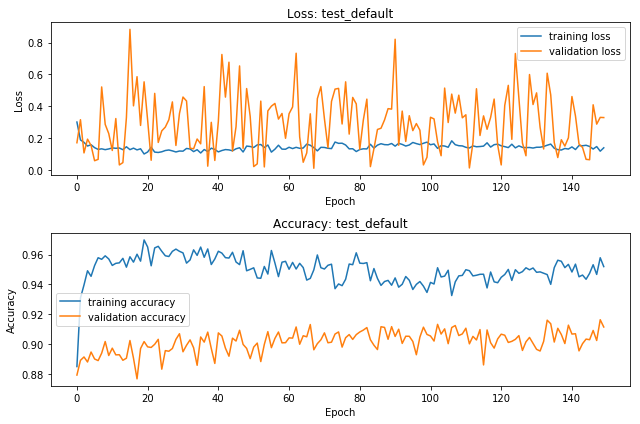

Model     test1a_batchsize

Strong:
precision 0.247
recall    0.262
f1        0.254
e_rate    1.163

Strong per-class:                       P	R	F	E
air_conditioner                         0.393	0.092	0.149	1.050
car_horn                                0.199	0.541	0.291	2.638
children_playing                        0.502	0.079	0.136	0.999
dog_bark                                0.386	0.156	0.222	1.092
drilling                                0.323	0.275	0.297	1.301
engine_idling                           0.271	0.193	0.225	1.325
gun_shot                                0.149	0.637	0.242	3.988
jackhammer                              0.668	0.092	0.162	0.954
siren                                   0.462	0.236	0.313	1.038
street_music                            0.300	0.432	0.354	1.578

Loss:


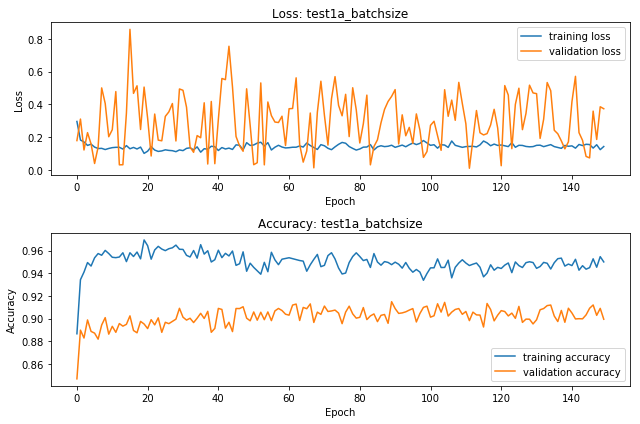

Model     test1b_batchsize

Strong:
precision 0.184
recall    0.191
f1        0.187
e_rate    1.231

Strong per-class:                       P	R	F	E
air_conditioner                         0.407	0.085	0.141	1.039
car_horn                                0.123	0.877	0.215	6.399
children_playing                        0.619	0.056	0.103	0.978
dog_bark                                0.179	0.213	0.194	1.767
drilling                                0.347	0.157	0.216	1.138
engine_idling                           0.552	0.078	0.136	0.985
gun_shot                                0.841	0.042	0.081	0.966
jackhammer                              0.740	0.086	0.155	0.944
siren                                   0.261	0.133	0.176	1.245
street_music                            0.190	0.302	0.233	1.989

Loss:


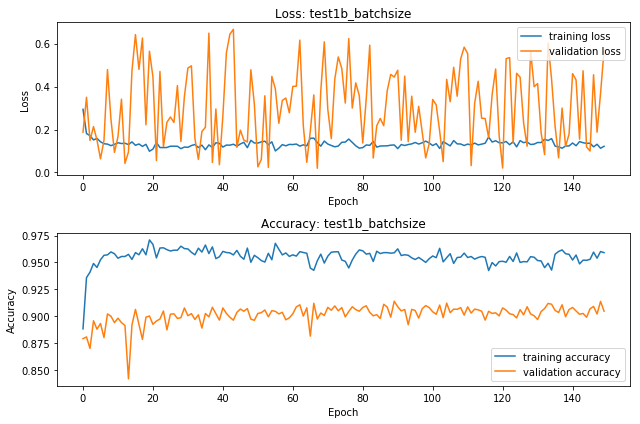

Model     test2a_epochsize

Strong:
precision 0.236
recall    0.212
f1        0.223
e_rate    1.099

Strong per-class:                       P	R	F	E
air_conditioner                         0.176	0.304	0.223	2.120
car_horn                                0.384	0.146	0.212	1.089
children_playing                        0.485	0.062	0.110	1.004
dog_bark                                0.367	0.044	0.078	1.032
drilling                                0.200	0.515	0.288	2.544
engine_idling                           0.424	0.100	0.162	1.036
gun_shot                                0.168	0.460	0.246	2.813
jackhammer                              0.590	0.116	0.194	0.965
siren                                   0.639	0.078	0.139	0.966
street_music                            0.333	0.322	0.327	1.323

Loss:


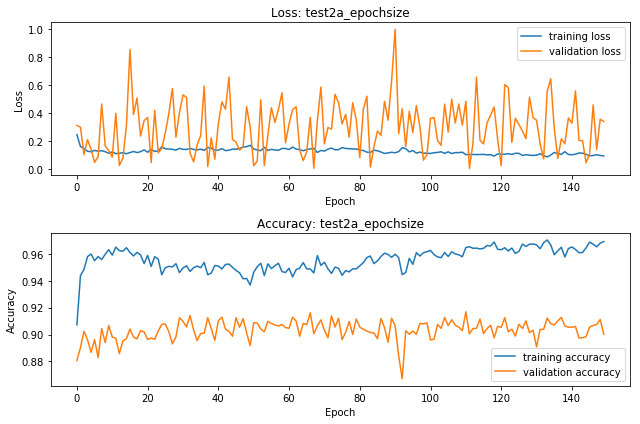

Model     test2b_epochsize

Strong:
precision 0.190
recall    0.327
f1        0.241
e_rate    1.546

Strong per-class:                       P	R	F	E
air_conditioner                         0.386	0.064	0.110	1.038
car_horn                                0.176	0.736	0.284	3.707
children_playing                        0.203	0.183	0.192	1.536
dog_bark                                0.199	0.238	0.217	1.721
drilling                                0.255	0.388	0.308	1.743
engine_idling                           0.161	0.686	0.261	3.882
gun_shot                                0.166	0.383	0.232	2.538
jackhammer                              0.653	0.109	0.186	0.949
siren                                   0.465	0.024	0.046	1.004
street_music                            0.185	0.528	0.273	2.804

Loss:


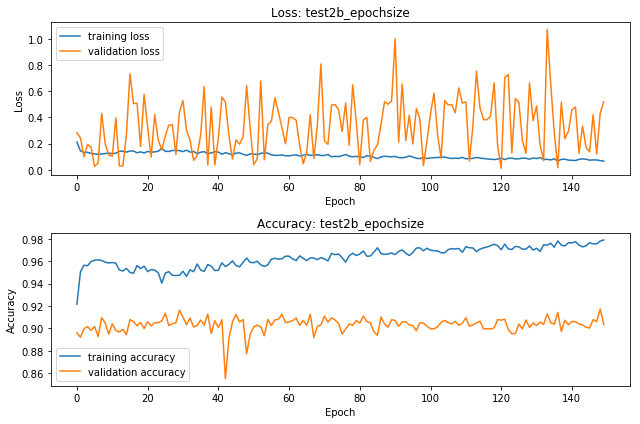

Model     test3a_validsdize

Strong:
precision 0.227
recall    0.285
f1        0.253
e_rate    1.252

Strong per-class:                       P	R	F	E
air_conditioner                         0.419	0.081	0.136	1.031
car_horn                                0.213	0.453	0.290	2.218
children_playing                        0.518	0.047	0.087	0.997
dog_bark                                0.268	0.238	0.252	1.412
drilling                                0.172	0.636	0.270	3.435
engine_idling                           0.506	0.109	0.179	0.998
gun_shot                                0.152	0.589	0.241	3.704
jackhammer                              0.740	0.099	0.175	0.936
siren                                   0.451	0.326	0.379	1.071
street_music                            0.296	0.352	0.322	1.484

Loss:


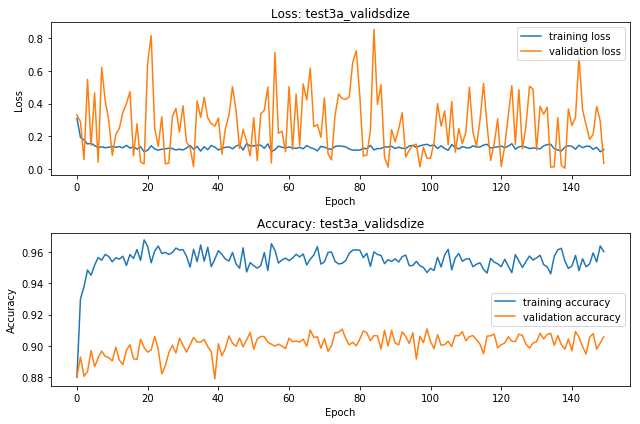

Model     test3b_validsdize

Strong:
precision 0.219
recall    0.286
f1        0.248
e_rate    1.363

Strong per-class:                       P	R	F	E
air_conditioner                         0.177	0.225	0.198	1.826
car_horn                                0.166	0.341	0.224	2.368
children_playing                        0.198	0.256	0.223	1.782
dog_bark                                0.183	0.264	0.216	1.912
drilling                                0.272	0.535	0.361	1.893
engine_idling                           0.447	0.140	0.213	1.033
gun_shot                                0.478	0.074	0.129	1.007
jackhammer                              0.208	0.166	0.184	1.464
siren                                   0.255	0.227	0.240	1.436
street_music                            0.213	0.605	0.315	2.632

Loss:


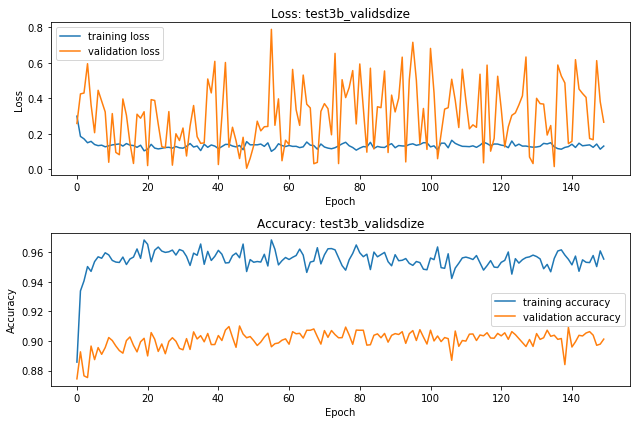

FileNotFoundError: [Errno 2] No such file or directory: '/beegfs/ci411/pcen/models/models_210/test4a_reducelr/results.json'

In [81]:
for model_name in model_list_210:
    report_results(model_path_210, model_name)